# Lending Club Case Study

## [0] INTRODUCTION

### This project is aimed to analyse the credit risk involved in the peer-to-peer lending system of "Lending Club" company.

In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbformat as nb
import seaborn as sns
import plotly_express as px
import warnings
from itertools import groupby
warnings.filterwarnings('ignore')

In [3]:
#reading the data
loan_data = pd.read_csv("loan.csv")

In [4]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
loan_data.shape

(39717, 111)

## STEP [1]: CLEANSING DATA

### [1.1] Nullified Data
- Those columns will be dropped.
- Example is all fields related to co-borrowers; across the sheet, there's zero co-borrower, meaning that any column with "joint" can be safely dropped

In [6]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

### [1.2] Single-value Data (zero, 1, etc.)
- Meaning that they have no impact on the data
- Other columns not contributing to the study should be removed, such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", and others
- 'funded_amnt_inv' is always equals to 'funded_amnt', so it's considered as a duplicate
- 'subgrade' is not important as 'grade' is enough for identifying the int_rate range

In [8]:
loan_data.columns[loan_data.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [9]:
loan_data.drop(loan_data.columns[loan_data.nunique() == 1], axis = 1, inplace = True)

In [10]:
# Dropping other data columns that include irrelevant information to the analysis
loan_data.drop(['id', 'member_id', 'url', 'title', 'emp_title', 'zip_code', 'last_credit_pull_d', 'addr_state','desc','out_prncp_inv','total_pymnt_inv', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d' , 'mths_since_last_delinq', 'mths_since_last_record','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','total_acc','funded_amnt_inv','sub_grade'], axis = 1, inplace = True)

In [11]:
loan_data.shape

(39717, 16)

### [1.3] Deriving new data fields from existing
- I noticed some loans were funded with an amount less than the requested, so I'll double check if this behaviour is associated with defaulting.
- Also, it'd look cleaner if the issue_d was splited into month and year

In [12]:
# Defining new column with values 0 and 1 to reflect if the funded amount is less than the requested
loan_data['fully_funded'] = np.where(loan_data.columns[1] == loan_data.columns[0],0,1)

In [13]:
# Defining two new columns for year and month of issue_d
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month

In [14]:
print('Number of columns:',loan_data.shape[1])
print('Number of rows:', loan_data.shape[0])

Number of columns: 19
Number of rows: 39717


#### Now we have 19 columns:
- I'm going to analyze those fields to understand the driving factors of loan defaulting before approving loan.


#### List of columns that might have impact on defaulting

In [15]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'revol_util',
       'pub_rec_bankruptcies', 'fully_funded', 'issue_year', 'issue_month'],
      dtype='object')

##### Fully paid and charged-off loans are to be considered in the analysis, so we need to eliminate loans with "Current" status

In [16]:
# Checking available Loan Status types
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [17]:
# Removing Current
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [18]:
# Re-checking for columns with same value again.
loan_data.columns[loan_data.nunique() == 1]

Index(['fully_funded'], dtype='object')

In [19]:
# Drop them, to make sure of full cleansing
loan_data.drop(loan_data.columns[loan_data.nunique() == 1], axis = 1, inplace = True)

In [20]:
print('Number of columns:',loan_data.shape[1])
print('Number of rows:', loan_data.shape[0])
loan_data.columns

Number of columns: 18
Number of rows: 38577


Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'revol_util',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

### [1.4] Checking if some columns still contain missing values

In [21]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
revol_util              0.129611
pub_rec_bankruptcies    1.806776
issue_year              0.000000
issue_month             0.000000
dtype: float64

### [1.5] Handling missing values
 - There are three columns with missing values, which are "emp_length", "revol_util" and "pub_rec_bankruptcies"
 - We need to check the content before taking decision on this field. 

In [22]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  dti                   38577 non-null  float64
 14  revol_util            38527 non-null  object 
 15  pub_rec_bankruptcie

In [23]:
# Sort in descending order the counts of loans against the emp_length
print(loan_data.emp_length.value_counts().sort_values(ascending=False))
print("Number of NULL cells:", loan_data.emp_length.isnull().sum(), "which represents", round(loan_data.emp_length.isnull().sum()/len(loan_data.emp_length.index)*100,2), "%")
print("Number of NA cells:", loan_data.emp_length.isna().sum(), "which represents", round(loan_data.emp_length.isna().sum()/len(loan_data.emp_length.index)*100,2), "%")

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
Number of NULL cells: 1033 which represents 2.68 %
Number of NA cells: 1033 which represents 2.68 %


##### The above result shows that the number of employess with 10+ years is much higher than that of the next most frequent value. This means that we can safely assign that value to the null values in the column. Also the missing values are in very low percentage. So replacing with same value doesnt affect the analysis much.

In [24]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
print(loan_data.emp_length.isna().sum())
print(loan_data.emp_length.isnull().sum())

0
0


In [25]:
# Applying the same "handling" process for revol_util
print(loan_data.revol_util.value_counts().sort_values(ascending=False))
print("Number of NULL cells:", loan_data.revol_util.isnull().sum(), "which represents", round(loan_data.revol_util.isnull().sum()/len(loan_data.revol_util.index)*100,2), "%")
print("Number of NA cells:", loan_data.revol_util.isna().sum(), "which represents", round(loan_data.revol_util.isna().sum()/len(loan_data.revol_util.index)*100,2), "%")


0%        954
63%        62
0.20%      62
40.70%     57
31.20%     57
         ... 
26.32%      1
33.26%      1
58.19%      1
57.56%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64
Number of NULL cells: 50 which represents 0.13 %
Number of NA cells: 50 which represents 0.13 %


In [26]:
loan_data.revol_util.fillna(loan_data.revol_util.mode()[0], inplace = True)
print(loan_data.revol_util.isna().sum())
print(loan_data.revol_util.isnull().sum())

0
0


In [27]:
# Applying the same "handling" process for bankruptcy
print(loan_data.pub_rec_bankruptcies.value_counts().sort_values(ascending=False))
print("Number of NULL cells:", loan_data.pub_rec_bankruptcies.isnull().sum(), "which represents", round(loan_data.pub_rec_bankruptcies.isnull().sum()/len(loan_data.pub_rec_bankruptcies.index)*100,2), "%")
print("Number of NA cells:", loan_data.pub_rec_bankruptcies.isna().sum(), "which represents", round(loan_data.pub_rec_bankruptcies.isna().sum()/len(loan_data.pub_rec_bankruptcies.index)*100,2), "%")

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64
Number of NULL cells: 697 which represents 1.81 %
Number of NA cells: 697 which represents 1.81 %


##### It's obvious the bankruptcy data is not relevant to the analysis, so it has to be dropped.

In [28]:
loan_data.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [29]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.0
funded_amnt            0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
revol_util             0.0
issue_year             0.0
issue_month            0.0
dtype: float64

### [1.6] Check how the final cleaned data looks like

In [30]:
loan_data.head()

loan_amnt  funded_amnt        term int_rate  installment grade emp_length  \
0       5000         5000   36 months   10.65%       162.87     B  10+ years   
1       2500         2500   60 months   15.27%        59.83     C   < 1 year   
2       2400         2400   36 months   15.96%        84.33     C  10+ years   
3      10000        10000   36 months   13.49%       339.31     C  10+ years   
5       5000         5000   36 months    7.90%       156.46     A    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

          purpose    dti revol_util  issue_year  issue_month  
0     credit_card  27.65     83.70%        2011           12  
1             car   1.00      9.40%        2011           12  
2  small_business   8.72     98.50%        2011           12  
3           other  20.00        21%        2011           12  
5         wedding  11.20     28.30%        2011           12

## STEP [2]: OUTLIERS TREATMENT

Making an assumption on possible fields of outliers as to be loan amount, annual income, dti, funded amount and the year the loan was issued

### 1. Loan Amount

In [31]:
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

In [32]:
quantile_info = loan_data.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [33]:
per_95_loan_amnt = loan_data['loan_amnt'].quantile(0.95)
loan_data = loan_data[loan_data.loan_amnt <= per_95_loan_amnt]

In [34]:
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

### 2. Annual Income

In [35]:
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income',labels={'annual_inc':'Annual Income'}).show()

In [36]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     57000.00
0.75     80000.00
0.90    110000.00
0.95    135000.00
0.97    157000.00
0.98    180000.00
0.99    215390.58
Name: annual_inc, dtype: float64

In [37]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

In [38]:
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income',labels={'annual_inc':'Annual Income'}).show()

### 3. DTI

In [39]:
px.box(loan_data,x='dti',width=750,height=350,title='DTI Ratio',labels={'dti':'DTI Ratio'}).show()

In [40]:
quantile_info = loan_data.dti.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    13.5350
0.75    18.6900
0.90    22.3800
0.95    23.8500
0.97    24.5333
0.98    24.8500
0.99    26.6111
Name: dti, dtype: float64

#### No visible outliers in dti field

### 4. Funded Amount

In [41]:
px.box(loan_data,x='funded_amnt',width=750,height=350,title='Distribution of Funded Amount',labels={'funded_amnt':'Funded Amount'}).show()

In [42]:
quantile_info = loan_data.funded_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     8737.5
0.75    13500.0
0.90    18800.0
0.95    21000.0
0.97    24000.0
0.98    25000.0
0.99    25000.0
Name: funded_amnt, dtype: float64

In [43]:
per_95_funded_amnt = loan_data['funded_amnt'].quantile(0.95)
loan_data = loan_data[loan_data.funded_amnt <= per_95_funded_amnt]

In [44]:
px.box(loan_data,x='funded_amnt',width=750,height=350,title='Distribution of Funded Amount',labels={'funded_amnt':'Funded Amount'}).show()

In [45]:
px.box(loan_data,y='int_rate',x='grade',width=750,height=350,title='Distribution of Interest Rate Against Grades',labels={'int_rate':'Interest Rate','grade':'Grade'}).show()

#### It's very noticeable that higher interest rates as in E, F and G has outliers. It might be an indication of defaulting

### 5. Issue Year of Loan

In [46]:
px.box(loan_data,x='issue_year',width=750,height=350,title='Distribution of Issued Years',labels={'issue_year':'Issued Year'}).show()

In [47]:
loan_data.issue_year.value_counts().sort_values()

2007      216
2008     1438
2009     4302
2010    10289
2011    17320
Name: issue_year, dtype: int64

In [48]:
#loan_data.drop(loan_data[loan_data['issue_year'] <= 2008].index, inplace=True)

In [49]:
loan_data.issue_year.value_counts().sort_values()

2007      216
2008     1438
2009     4302
2010    10289
2011    17320
Name: issue_year, dtype: int64

In [50]:
px.box(loan_data,x='issue_year',width=750,height=350,title='Distribution of Issued Years',labels={'issue_year':'Issued Year'}).show()

### 7.

## STEP [3] ANALYZING DATA 


### [3.0] Creating Buckets of Data for easier filteration

In [51]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'],bins = 5, precision = 0, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k+'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5, precision=0,labels=['12-15%','15-18%','18-20%','20-22%','>22%'])

### [3.1] Univariate Analysis

<AxesSubplot: xlabel='loan_status', ylabel='count'>

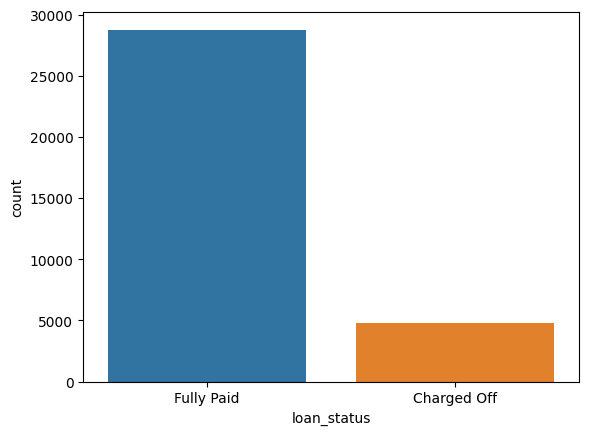

In [52]:
# Loan status
sns.countplot(x = 'loan_status', data = loan_data)

**Observation:** Percentage of charged off is very low compared to the fully charged loans. Charged off loans are the matter of analysis from now onwards.

<AxesSubplot: xlabel='grade', ylabel='count'>

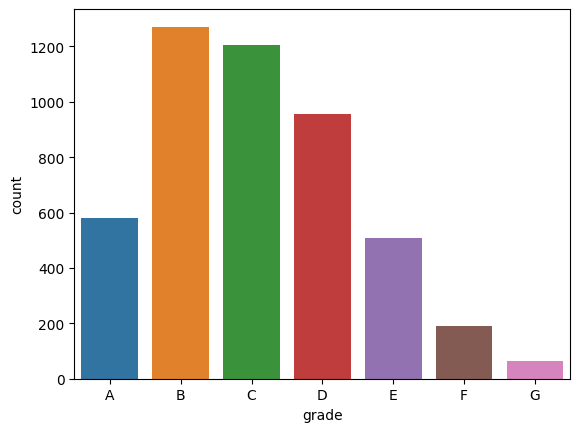

In [53]:
# Loan Status against Grade for "Charged off" loans
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [54]:
# Loan Amount
print(loan_data.loan_amnt.describe())

count    33565.000000
mean      9277.264263
std       5279.100287
min        500.000000
25%       5000.000000
50%       8150.000000
75%      12500.000000
max      25000.000000
Name: loan_amnt, dtype: float64


**Observation:** Loans varies from 500 to 25,000, which is a wide gap and requires deeper analysis

<AxesSubplot: xlabel='term', ylabel='count'>

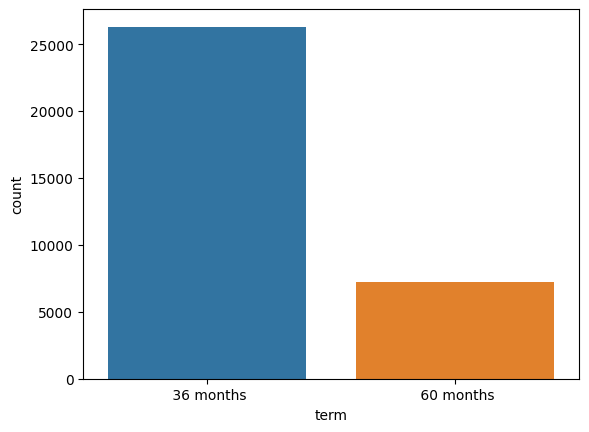

In [55]:
# Term of loan 
sns.countplot(x = 'term', data = loan_data)

In [56]:
print("The majority of borrowers have registered on 36 months, which represents", round((loan_data.term.value_counts()*100/loan_data.term.count())[0],2), "%.")
print(loan_data.term.value_counts()*100/loan_data.term.count())

The majority of borrowers have registered on 36 months, which represents 78.37 %.
 36 months    78.370326
 60 months    21.629674
Name: term, dtype: float64


**Observation:** The majority of borrowers have registered on 36 months, which represents 79.14 %

In [57]:
# Distribution of interest rate
px.box(loan_data,x='int_rate',width=750,height=350,title='Distribution of Interest Rates',labels={'int_rate':'Interest Rate'}).show()

**Observation**  Despite having outliers in the interest rate, but this field can not be treated as such, since it's correlated 

### [3.2] Bivariate Analysis

### 5. Interest Rate & Grade
- Understand the relation between 'int_rate' and 'grade' with the emp_length and bankrupcy

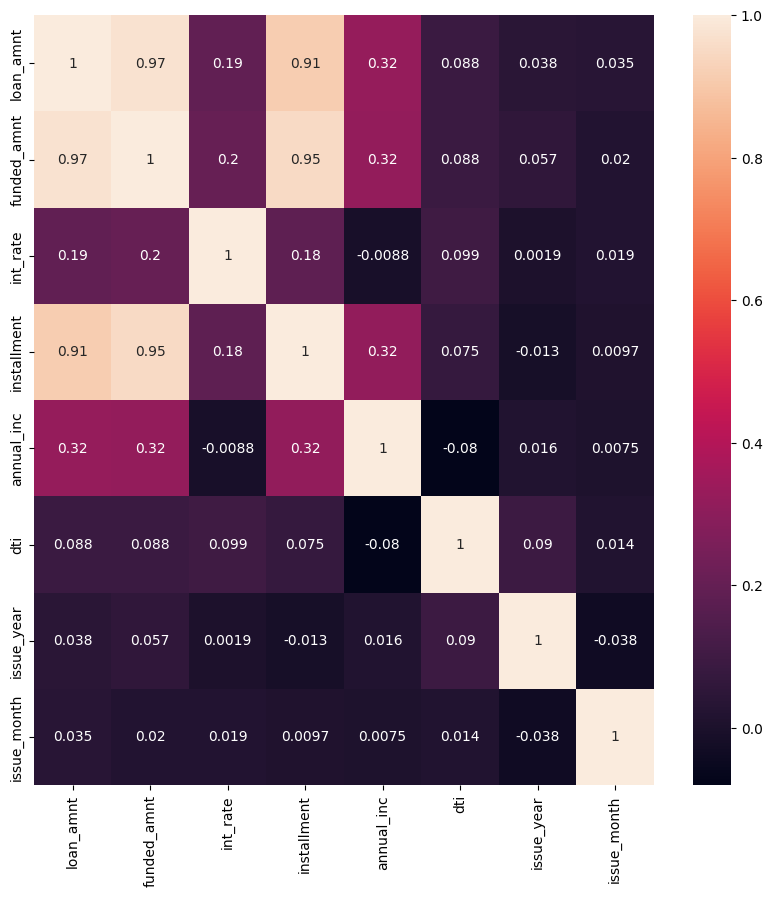

In [58]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()